In [1]:
#import the packages
from tensorflow.keras.models import Sequential  # neural network CNN
from tensorflow.keras.layers import Conv2D   # convolution layer
from tensorflow.keras.layers import MaxPooling2D   # Pooling layer
from tensorflow.keras.layers import Activation  # activation function
from tensorflow.keras.layers import Flatten   # reshapes input data into a 1-D array
from tensorflow.keras.layers import Dense   # create input layer, hidden layer, output layer
from tensorflow.keras import backend as K  # determines the data format of an image
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # for data augmentation
from tensorflow.keras.optimizers import Adam  # an optimizer check the difference between actual & predicted value
from tensorflow.keras.preprocessing.image import img_to_array  # convert image into array
from tensorflow.keras.utils import to_categorical  # convert array of integers into array of binary values

In [2]:
from sklearn.model_selection import train_test_split  # splitting the data

from imutils import paths     # to get list of images saved in our dataset
import matplotlib.pyplot as plt
import numpy as np
import argparse   # allows us to write command-line interfaces for our code
import random
import cv2   # computer vision lib. for reading & preprocessing the image
import os    # operating system

import warnings
from tqdm import tqdm_notebook as tqdm   # show progress bar
import itertools  # generate values one at a time

import tensorflow as tf
warnings.filterwarnings("ignore")
SEED=42 #set random seed

print(tf.__version__)   # version of tensorflow lib.

2.17.0


In [3]:
class LeNet:  # create a class
    @staticmethod
    def build(width, height, depth, classes):

        model = Sequential()  # CNN model
        inputShape = (height, width, depth)


        if K.image_data_format() == "channels_first":
            inputShape = (depth, height, width)

        model.add(Conv2D(20, (5, 5), padding="same",input_shape=inputShape))  # create convolution layer
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))  # create  Pooling layer


        model.add(Conv2D(50, (5, 5), padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

        model.add(Flatten())  # reshape input data into 1D array
        model.add(Dense(500))  # create input, hidden & output layer
        model.add(Activation("relu"))  # relu activation function

        model.add(Dense(classes))
        model.add(Activation("softmax"))

        return model

In [4]:
from google.colab import drive  # give permission to Colab to access files saved in our google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import os
os.chdir('/content/drive/MyDrive/DL_Convolution')  # change directory & come to the present working folder DL_Convolution

In [6]:
!dir  # show all the files in current folder

dataset.rar  DL_CNN.ipynb


In [7]:
!pip install patool
import patoolib
patoolib.extract_archive('dataset.rar')  # unzip dataset.rar file

INFO patool: Extracting dataset.rar ...
INFO:patool:Extracting dataset.rar ...
INFO patool: running /usr/bin/unrar x -- /content/drive/MyDrive/DL_Convolution/dataset.rar
INFO:patool:running /usr/bin/unrar x -- /content/drive/MyDrive/DL_Convolution/dataset.rar
INFO patool:     with cwd='./Unpack_aypbt3as', input=''
INFO:patool:    with cwd='./Unpack_aypbt3as', input=''
INFO patool: ... dataset.rar extracted to `dataset'.
INFO:patool:... dataset.rar extracted to `dataset'.


'dataset'

In [8]:
DATASET = "dataset"  # this folder must contain three subfolder with images

In [9]:
EPOCHS = 25  # define epochs
BS = 32  # Batch Size

In [10]:
# initialize the data and labels
print("[INFO] loading images...")
data = []    # empty list
labels = []

# grab the image paths and randomly shuffle them
imagePaths = sorted(list(paths.list_images(DATASET)))  # we get list of images, arrange them in ascending order
random.seed(42)  # 42 images stored at a time
random.shuffle(imagePaths)  # randomly shuffle all the images

# progress bar
with tqdm(total=len(imagePaths)) as pbar:  # show progress bar

    # loop over the input images
    for idx, imagePath in enumerate(imagePaths):
        # load the image, pre-process it, and store it in the data list
        image = cv2.imread(imagePath)   # read image
        image = cv2.resize(image, (28, 28))  # resize the image
        image = img_to_array(image)  # convert image into an array which store numbers
        data.append(image)   # store the numbers into the empty list data

        # extract the class label from the image path and update the
        # labels list
        label = imagePath.split(os.path.sep)[-2]  # convert categorical classes into numeric



        if label == "Buildings":
            label = 0
        elif label == "Forest":
            label = 1
        elif label == "Sea":
            label = 2

        # print("pr: ", label)

        labels.append(label)  # store the numeric value of classes into empty list labels

        # update the progressbar
        pbar.update(1)

[INFO] loading images...


  0%|          | 0/1326 [00:00<?, ?it/s]

In [11]:
# define x & y
data = np.array(data, dtype="float") / 255.0  #x
labels = np.array(labels)  #y

In [12]:
labels

array([0, 1, 0, ..., 0, 0, 2])

In [13]:
data

array([[[[0.92941176, 0.81960784, 0.77647059],
         [0.94117647, 0.84313725, 0.80392157],
         [0.92941176, 0.84313725, 0.8       ],
         ...,
         [0.7372549 , 0.56078431, 0.45490196],
         [0.78431373, 0.61176471, 0.49019608],
         [0.76470588, 0.54117647, 0.41568627]],

        [[0.92156863, 0.81176471, 0.75294118],
         [0.90980392, 0.82352941, 0.77647059],
         [0.9254902 , 0.85098039, 0.81960784],
         ...,
         [0.83921569, 0.6627451 , 0.56862745],
         [0.71372549, 0.45882353, 0.31372549],
         [0.68235294, 0.44313725, 0.30196078]],

        [[0.89411765, 0.78039216, 0.72156863],
         [0.95294118, 0.85882353, 0.80784314],
         [0.96078431, 0.88235294, 0.83921569],
         ...,
         [0.80784314, 0.60392157, 0.48235294],
         [0.81960784, 0.61176471, 0.47058824],
         [0.70980392, 0.4627451 , 0.31764706]],

        ...,

        [[0.60784314, 0.64313725, 0.6745098 ],
         [0.56078431, 0.59607843, 0.64705882]

In [14]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.25, random_state=42) # split x & y into 2 parts

In [15]:
trainX

array([[[[0.46666667, 0.46666667, 0.46666667],
         [0.71764706, 0.71764706, 0.71764706],
         [0.37254902, 0.37254902, 0.37254902],
         ...,
         [0.00784314, 0.00784314, 0.00784314],
         [0.51372549, 0.51372549, 0.51372549],
         [0.56862745, 0.56862745, 0.56862745]],

        [[0.50980392, 0.50980392, 0.50980392],
         [0.46666667, 0.46666667, 0.46666667],
         [0.54509804, 0.54509804, 0.54509804],
         ...,
         [0.01960784, 0.01960784, 0.01960784],
         [0.50196078, 0.50196078, 0.50196078],
         [0.54901961, 0.54901961, 0.54901961]],

        [[0.47843137, 0.47843137, 0.47843137],
         [0.47843137, 0.47843137, 0.47843137],
         [0.53333333, 0.53333333, 0.53333333],
         ...,
         [0.41176471, 0.41176471, 0.41176471],
         [0.7254902 , 0.7254902 , 0.7254902 ],
         [0.61176471, 0.61176471, 0.61176471]],

        ...,

        [[0.36862745, 0.36862745, 0.36862745],
         [0.63921569, 0.63921569, 0.63921569]

In [16]:
trainX.shape  # 994 training rows, all images are of same shape & same size, there are 3 classes

(994, 28, 28, 3)

In [17]:
trainY.shape

(994,)

In [18]:
trainY = to_categorical(trainY, num_classes=3)  # convert integers into binary values
testY = to_categorical(testY, num_classes=3)

In [19]:
trainY

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [20]:
trainY[0]

array([1., 0., 0.])

In [21]:
# generate more no. of images to get the sufficient data for training the model using data augmentation
aug = ImageDataGenerator(rotation_range=30,
                         width_shift_range=0.1,
                         height_shift_range=0.1,
                         shear_range=0.2,
                         zoom_range=0.2,
                         horizontal_flip=True,
                         fill_mode="nearest")

In [22]:
# initialize the model
print("[INFO] compiling model...")
model = LeNet.build(width=28, height=28, depth=3, classes=3) # again define the model using LeNet class
opt = Adam() # it is an optimizer to check the difference between actual & predicted values
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])  # compile the CNN model

print("[INFO] model complied...")

[INFO] compiling model...
[INFO] model complied...


In [23]:
print(model.summary())  # model summary

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 20)          │           1,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 28, 28, 20)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 20)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 50)          │          25,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 14, 14, 50)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 50)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2450)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 500)                 │       1,225,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │           1,503 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 3)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,253,573 (4.78 MB)

 Trainable params: 1,253,573 (4.78 MB)

 Non-trainable params: 0 (0.00 B)

None


In [24]:
# train the network
print("[INFO] training network...")
H = model.fit(x=aug.flow(trainX, trainY, batch_size=BS),
              validation_data=(testX, testY),
              steps_per_epoch=len(trainX) // BS,
              epochs=EPOCHS,
              verbose=1)

[INFO] training network...
Epoch 1/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 11s 264ms/step - accuracy: 0.4263 - loss: 1.0756 - val_accuracy: 0.7018 - val_loss: 0.6607
Epoch 2/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7188 - loss: 0.7071 - val_accuracy: 0.6867 - val_loss: 0.7336
Epoch 3/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 7s 171ms/step - accuracy: 0.6323 - loss: 0.8332 - val_accuracy: 0.7289 - val_loss: 0.6028
Epoch 4/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7500 - loss: 0.7261 - val_accuracy: 0.7651 - val_loss: 0.5432
Epoch 5/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 11s 212ms/step - accuracy: 0.7022 - loss: 0.6848 - val_accuracy: 0.7771 - val_loss: 0.5066
Epoch 6/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7812 - loss: 0.7654 - val_accuracy: 0.8012 - val_loss: 0.4942
Epoch 7/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.7135 - loss: 0.7183 - val_accuracy: 0.8102 - val_loss: 0.5100
Epoch 8/25
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7812 - loss: 0.

In [25]:
print("[INFO] serializing network...")
model.save('Scene.model.h5')  # save the model for future use

[INFO] serializing network...


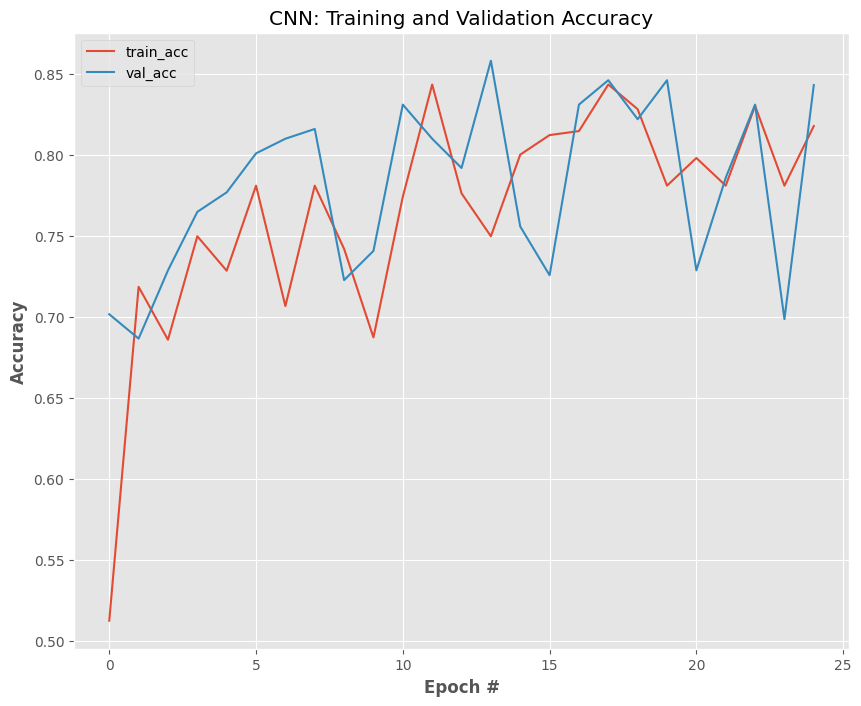

In [26]:
# plot the training and validation accuracy
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("CNN: Training and Validation Accuracy")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Accuracy", weight="bold")
plt.legend()
plt.show()

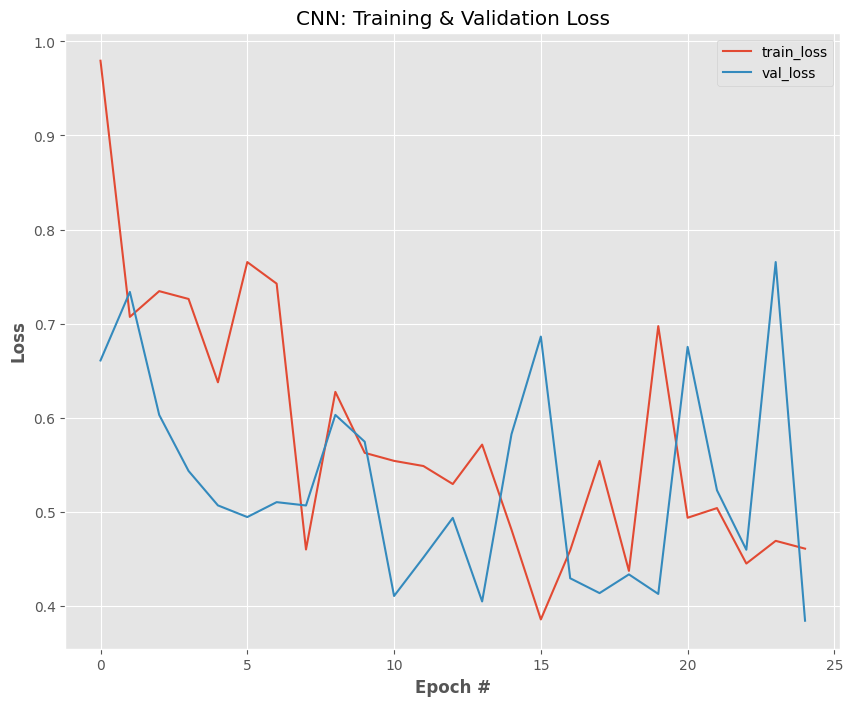

In [27]:
# plot the training and validation loss
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.title("CNN: Training & Validation Loss")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Loss", weight="bold")
plt.legend()
plt.show()

In [28]:
! pip install gradio==3.50
import gradio as gr  # deployment using gradio lib.

In [29]:
def predict_image(image):  # define a function & load an image from internet into it for testing the model
    # load the image

    # pre-process the image for classification
    image = cv2.resize(image, (28, 28))  # resize the image
    image = image.astype("float") / 255.0
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)


    preds = model.predict(image)[0]
    result = dict()
    result["Buildings"] = round(float(list(preds)[0]), 3)
    result["Forest"] = round(float(list(preds)[1]), 3)
    result["Sea"] = round(float(list(preds)[2]), 3)

    print(result)

    return result

In [30]:
im = gr.inputs.Image(shape=(32,32))
label = gr.outputs.Label(num_top_classes=3)

gr.Interface(fn=predict_image, inputs=im, outputs=label, capture_session=True, title="CNN Demo").launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
IMPORTANT: You are using gradio version 3.50.0, however version 4.29.0 is available, please upgrade.
--------
Running on public URL: https://332c4cee9ba0b0f8dc.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
